In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

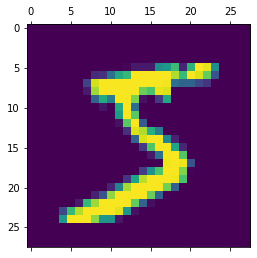

In [7]:
plt.matshow(x_train[0])

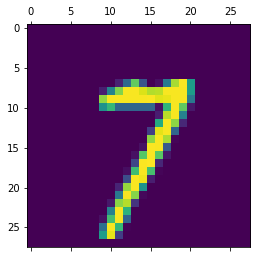

In [8]:
plt.matshow(x_test[5064])

In [9]:
y_train[0]

5

In [10]:
y_test[5064]

7

In [11]:
x_train = x_train/255
x_test = x_test/255

flattening data

In [12]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [13]:
x_test_flattened.shape

(10000, 784)

In [14]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer ='adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 938us/step - loss: 0.4860 - accuracy: 0.8803
Epoch 2/5
1875/1875 [==============================] - 2s 949us/step - loss: 0.3058 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 2s 957us/step - loss: 0.2853 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.2746 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.2676 - accuracy: 0.9260


In [16]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 736us/step - loss: 0.2698 - accuracy: 0.9248


[0.2697598338127136, 0.9247999787330627]

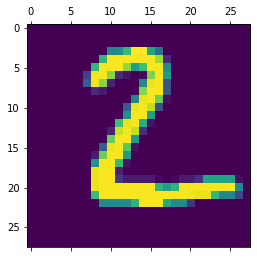

In [17]:
plt.matshow(x_test[1])

In [18]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

array([2.2691488e-04, 1.3172696e-06, 4.1726837e-01, 2.0438433e-04,
       1.8931531e-13, 1.0662973e-03, 3.4165382e-03, 4.2422856e-16,
       5.2774292e-05, 8.0797603e-13], dtype=float32)

In [19]:
np.argmax(y_predicted[1])

2

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 4,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [21]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1115,    2,    2,    0,    1,    4,    2,    9,    0],
       [   9,   10,  923,   17,    9,    1,   13,   12,   35,    3],
       [   4,    0,   16,  931,    0,   12,    3,   13,   22,    9],
       [   1,    1,    4,    1,  920,    0,   10,    4,    8,   33],
       [  12,    3,    4,   44,   12,  749,   19,    9,   32,    8],
       [  12,    3,    9,    1,    9,    6,  913,    2,    3,    0],
       [   1,    7,   24,    3,    7,    0,    0,  956,    0,   30],
       [  10,    9,    6,   20,    9,   19,   10,   12,  866,   13],
       [  11,    6,    1,    9,   32,    4,    0,   29,    5,  912]])>

Text(69.0, 0.5, 'truth')

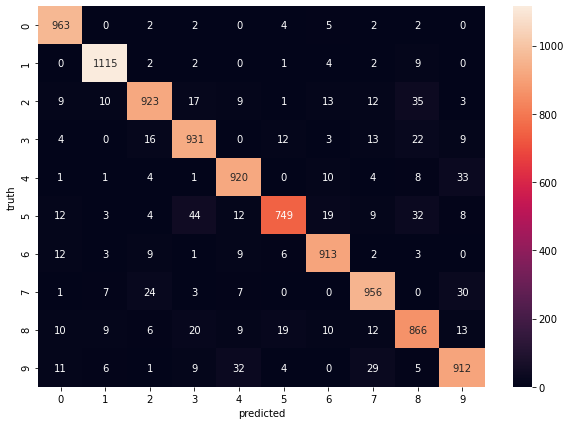

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")    

])
model.compile(
    optimizer ='adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2990 - accuracy: 0.9161
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1385 - accuracy: 0.9592
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0994 - accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0786 - accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0627 - accuracy: 0.9811


In [24]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 868us/step - loss: 0.0910 - accuracy: 0.9715


[0.09104114025831223, 0.9714999794960022]

Text(69.0, 0.5, 'truth')

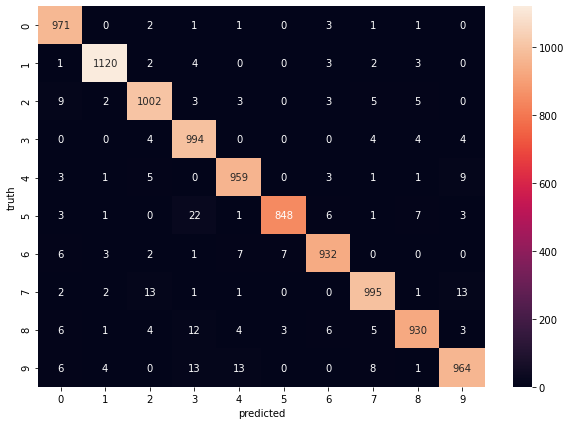

In [25]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")    

])
model.compile(
    optimizer ='adam',
    loss ='SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3023 - accuracy: 0.9156
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1407 - accuracy: 0.9586
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0994 - accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0773 - accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0622 - accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0431 - accuracy: 0.9864
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0356 - accuracy: 0.9894
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.025